## Spam SMS:

`Spam SMS, often referred to as "spam," are unsolicited and irrelevant messages sent in bulk to a large number of recipients.
The primary purpose of spam messages is to promote products, services, or websites, typically for commercial purposes. They can also contain scams or fraudulent offers.`

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np

In [2]:
data = pd.read_csv('C:/Users/92314/Desktop/Untitled Folder/Codsoft/Spam mail Classification/dataset/spam.csv', encoding = "ISO-8859-1")

In [3]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
# Rename columns using the rename() method
new_column_names = {'v1': 'class', 'v2': 'sms'}
data = data.rename(columns=new_column_names)


In [5]:
data

,class,sms,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
#droping extra columns
data = data[['class','sms']]

In [7]:
data.head(5)

,class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data['class'].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

In [9]:
import re

def clean_text(text):
    cleaned_text = re.sub(r'^.*?\n', '', str(text))   #remove all text up to the first newline character
    cleaned_text2 = re.sub(r'[^a-zA-Z\s]', '', str(cleaned_text)) #remove numbers and special characters
#     cleaned_text3 = re.sub(r'\s\s+', '', str(cleaned_text2)) #remove extra spaces
    
    return cleaned_text2

In [10]:
data['sms'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [11]:
data['sms'] = data['sms'].apply(clean_text)

In [12]:
data['sms'][2]

'Free entry in  a wkly comp to win FA Cup final tkts st May  Text FA to  to receive entry questionstd txt rateTCs apply overs'

In [13]:
from nltk.corpus import stopwords

In [14]:
# Define a function to remove stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [15]:
# Apply the remove_stopwords function to the 'text' column
data['sms'] = data['sms'].apply(remove_stopwords)

In [16]:
data['sms']

0       Go jurong point crazy Available bugis n great ...
1                                 Ok lar Joking wif u oni
2       Free entry wkly comp win FA Cup final tkts st ...
3                     U dun say early hor U c already say
4             Nah dont think goes usf lives around though
                              ...                        
5567    nd time tried contact u U Pound prize claim ea...
5568                            b going esplanade fr home
5569                          Pity mood Soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       Rofl true name
Name: sms, Length: 5572, dtype: object

In [17]:
from nltk.stem.porter import PorterStemmer

In [18]:
ps = PorterStemmer()

In [19]:
ps.stem('likely')

'like'

In [20]:
def stem(text):
    List = []
    
    for i in text.split():  # Split the text into words and stem each word
        List.append(ps.stem(i))
        
    # Join the stemmed words back into a single string
    return ' '.join(List)

In [21]:
data['sms'] = data['sms'].apply(stem)

In [22]:
data

,class,sms
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt st m...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah dont think goe usf live around though
...,...,...
5567,spam,nd time tri contact u u pound prize claim easi...
5568,ham,b go esplanad fr home
5569,ham,piti mood soani suggest
5570,ham,guy bitch act like id interest buy someth els ...


In [26]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

In [27]:
tokenizer.fit_on_texts(data['sms'])

In [28]:
tokenizer.word_index

{'u': 1,
 'call': 2,
 'im': 3,
 'go': 4,
 'get': 5,
 'ur': 6,
 'come': 7,
 'dont': 8,
 'free': 9,
 'ok': 10,
 'ltgt': 11,
 'know': 12,
 'like': 13,
 'day': 14,
 'love': 15,
 'want': 16,
 'ill': 17,
 'got': 18,
 'time': 19,
 'good': 20,
 'text': 21,
 'send': 22,
 'need': 23,
 'one': 24,
 'txt': 25,
 'see': 26,
 'today': 27,
 'think': 28,
 'home': 29,
 'stop': 30,
 'repli': 31,
 'take': 32,
 'lor': 33,
 'tell': 34,
 'sorri': 35,
 'r': 36,
 'still': 37,
 'back': 38,
 'mobil': 39,
 'make': 40,
 'n': 41,
 'phone': 42,
 'new': 43,
 'say': 44,
 'pleas': 45,
 'week': 46,
 'work': 47,
 'well': 48,
 'later': 49,
 'da': 50,
 'hi': 51,
 'ask': 52,
 'miss': 53,
 'cant': 54,
 'meet': 55,
 'hope': 56,
 'happi': 57,
 'night': 58,
 'claim': 59,
 'wait': 60,
 'thing': 61,
 'tri': 62,
 'give': 63,
 'much': 64,
 'dear': 65,
 'great': 66,
 'oh': 67,
 'hey': 68,
 'pl': 69,
 'wat': 70,
 'messag': 71,
 'number': 72,
 'friend': 73,
 'thank': 74,
 'that': 75,
 'way': 76,
 'msg': 77,
 'prize': 78,
 'right': 79,


In [29]:
tokenizer.document_count

5572

In [30]:
tokenizer.word_counts

OrderedDict([('go', 453),
             ('jurong', 1),
             ('point', 33),
             ('crazi', 15),
             ('avail', 16),
             ('bugi', 7),
             ('n', 144),
             ('great', 112),
             ('world', 36),
             ('la', 9),
             ('e', 85),
             ('buffet', 2),
             ('cine', 7),
             ('got', 239),
             ('amor', 1),
             ('wat', 109),
             ('ok', 277),
             ('lar', 38),
             ('joke', 16),
             ('wif', 27),
             ('u', 1143),
             ('oni', 4),
             ('free', 278),
             ('entri', 26),
             ('wkli', 14),
             ('comp', 11),
             ('win', 80),
             ('fa', 4),
             ('cup', 9),
             ('final', 33),
             ('tkt', 4),
             ('st', 54),
             ('may', 46),
             ('text', 225),
             ('receiv', 46),
             ('questionstd', 2),
             ('txt', 177),
          

In [31]:
sequences = tokenizer.texts_to_sequences(data['sms'])

In [32]:
sequences

[[4,
  3350,
  286,
  577,
  542,
  1032,
  41,
  66,
  259,
  866,
  91,
  2306,
  1033,
  18,
  3351,
  70],
 [10, 246, 543, 362, 1, 1516],
 [9,
  374,
  606,
  743,
  102,
  1517,
  867,
  287,
  1518,
  169,
  201,
  21,
  1517,
  202,
  374,
  2307,
  25,
  2308,
  278,
  2309],
 [1, 167, 44, 288, 2310, 1, 96, 85, 44],
 [790, 8, 28, 375, 744, 158, 143, 376],
 [690,
  68,
  1034,
  46,
  162,
  38,
  289,
  13,
  300,
  37,
  1519,
  10,
  290,
  868,
  2311,
  22,
  1520],
 [86, 445, 13, 270, 484, 13, 2312, 3352],
 [150,
  745,
  1165,
  1165,
  1521,
  1796,
  1797,
  1798,
  377,
  791,
  501,
  643,
  746,
  73,
  791],
 [544, 522, 291, 138, 260, 2313, 78, 691, 59, 2, 59, 326, 2314, 417, 175],
 [39, 191, 1, 36, 937, 389, 236, 404, 39, 261, 9, 2, 39, 389, 97, 9],
 [3, 155, 29, 151, 8, 16, 144, 211, 938, 145, 92, 109, 1035, 335, 27],
 [1522,
  231,
  102,
  112,
  336,
  25,
  2315,
  22,
  237,
  2316,
  14,
  2317,
  278,
  31,
  939,
  607],
 [135, 46, 9, 1799, 78, 2318, 25, 1

In [33]:
sequences[1] #first sms into sequence of tokens

[10, 246, 543, 362, 1, 1516]

In [34]:
from keras.utils import pad_sequences

In [35]:
pd_sequences = pad_sequences(sequences=sequences, padding='post') #padding all tokens to same length

In [36]:
pd_sequences[1]

array([  10,  246,  543,  362,    1, 1516,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0])

In [37]:
print(f"Length of the 1st sequence: {len(pd_sequences[0])}")
print(f"Length of the 2nd sequence: {len(pd_sequences[1])}")

Length of the 1st sequence: 80
Length of the 2nd sequence: 80


In [38]:
data.head()

,class,sms
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt st m...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah dont think goe usf live around though


In [39]:
#encoding the class column

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])  # [0=ham, 1=spam]

In [42]:
data.head()

,class,sms
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri wkli comp win fa cup final tkt st m...
3,0,u dun say earli hor u c alreadi say
4,0,nah dont think goe usf live around though


# MODELING

## 1. RandomForest Classifier

In [43]:
X = pd_sequences
Y = data['class']

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=.25, shuffle=True)

In [45]:
len(x_train)

4179

In [46]:
y_train

952     0
1269    0
1838    1
3749    0
4151    0
       ..
983     0
2729    1
4935    0
2569    0
4492    0
Name: class, Length: 4179, dtype: int32

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
clf = RandomForestClassifier()

In [49]:
model = clf.fit(x_train,y_train)

In [50]:
model.score(x_test,y_test)

0.9339554917444365

In [51]:
y_pred = model.predict(x_test)

In [52]:
y_prob = clf.predict_proba(x_test)
y_prob[:5]

array([[0.94, 0.06],
       [0.86, 0.14],
       [0.98, 0.02],
       [0.15, 0.85],
       [0.98, 0.02]])

In [53]:
y_prob[:5] ,y_test[:5]

(array([[0.94, 0.06],
        [0.86, 0.14],
        [0.98, 0.02],
        [0.15, 0.85],
        [0.98, 0.02]]),
 2968    0
 2773    1
 3737    0
 4106    1
 5502    0
 Name: class, dtype: int32)

In [54]:
# Case-1 if our model predicts 1 and the actual value is also 1, then it is called "True Positive"
# Case-2 if our model predicts 1 and the actual value is 0, then it is called "False Positive"
#______________________________________________________
# Case-3 if our model predicts 0 and the actual value is also 0, then it is called "True Negative"
# Case-4 if our model predicts 0 and the actual value is  1, then it is called "False Negative"

In [55]:
# Now we can figure out the True Positive rate & False Poisitve rate using roc_curve

print(y_prob[:,1])

[0.06 0.14 0.02 ... 0.11 0.   0.52]


In [56]:
y_proba_positive = y_prob[:,1]

In [57]:
from sklearn.metrics import roc_curve

#calcute fpr, tpr, threshold
fpr,tpr,threshold = roc_curve(y_test, y_proba_positive)

In [58]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.25082508e-04,
       8.25082508e-04, 8.25082508e-04, 2.47524752e-03, 2.47524752e-03,
       2.47524752e-03, 2.47524752e-03, 4.12541254e-03, 4.95049505e-03,
       4.95049505e-03, 5.77557756e-03, 8.25082508e-03, 9.07590759e-03,
       1.23762376e-02, 1.48514851e-02, 1.89768977e-02, 1.89768977e-02,
       2.31023102e-02, 2.39273927e-02, 2.80528053e-02, 2.88778878e-02,
       3.21782178e-02, 3.30033003e-02, 3.54785479e-02, 4.12541254e-02,
       4.45544554e-02, 5.11551155e-02, 5.77557756e-02, 6.60066007e-02,
      

In [59]:
# as cross_validation gives us mutiple values [1 dimensional] then we take mean/average for robustness
# and score() gives us single value [0 dimensional]

# now we have [2d vector] we have to take average and then plot
# to take the average a technique is used called "Area under the Curve"

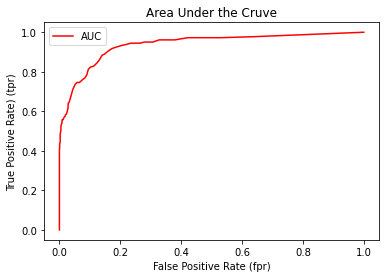

In [60]:
# create a function for plotting using matplotlib
import matplotlib.pyplot as plt

def plot_roc(fpr,tpr):
    
    # plot roc curve
    plt.plot(fpr,tpr, color="red", label="AUC")
    
    #customise the plot
    plt.title("Area Under the Cruve")
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate) (tpr)")
    plt.legend()
    plt.show()
    
plot_roc(fpr,tpr)

In [61]:
#finding the value of are under the curve

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_proba_positive)

0.9370954360629433

AUC Score: The ROC AUC score quantifies the overall performance of our classifier by measuring the area under the ROC curve.
A perfect classifier will have an AUC score of 1, 
while a random or ineffective classifier will have an AUC score of 0.5 (equivalent to guessing).

In [62]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred = y_pred)
print(cm)

[[1206    6]
 [  86   95]]


In [63]:
import seaborn as sns

def plot_confmatrix(conf_mat):
    
    """
    this plots confusion matrix
    """
    
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     cmap = 'Blues',
                     annot=True,
                     cbar = True,
                     fmt=""  #changes the numbers format
                    )
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

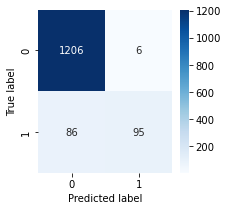

In [64]:
plot_confmatrix(cm)

In [65]:
report = classification_report(y_test, y_pred)

In [66]:
print(report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1212
           1       0.94      0.52      0.67       181

    accuracy                           0.93      1393
   macro avg       0.94      0.76      0.82      1393
weighted avg       0.93      0.93      0.93      1393



In [67]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X,Y,cv=5, scoring=None)

array([0.92017937, 0.93363229, 0.93357271, 0.91831239, 0.92190305])

In [68]:
#single layer                     #multiple layers
clf.score(x_test,y_test) , np.mean(cross_val_score(clf,X,Y,cv=5, scoring=None))

(0.9339554917444365, 0.9264163399376868)

____________________

## 2. Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
lr_model = LogisticRegression(max_iter=3000)

In [71]:
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=3000)

In [72]:
lr_model.score(x_test,y_test)

0.8686288585786073

____________________

# Using Tfidf Vectorizor

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


X = data['sms'] 
Y = data['class']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, shuffle=True)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(
    use_idf=True,   # Use IDF in TF-IDF calculations
    smooth_idf=True, # Add 1 to document frequencies to prevent division by zero
)

# Fit the vectorizer on training data to learn the vocabulary and IDF weights
tfidf_vectorizer.fit(x_train)

TfidfVectorizer()

In [77]:
# Transforms training data using the same vectorizer
x_train = tfidf_vectorizer.transform(x_train)

# TransformS test data using the same vectorizer
x_test = tfidf_vectorizer.transform(x_test)


In [78]:
tfidf_vectorizer.get_feature_names_out().tolist()

['aa',
 'aah',
 'aaniy',
 'aaooooright',
 'aathilov',
 'aathiwher',
 'ab',
 'abbey',
 'abdomen',
 'abeg',
 'aberdeen',
 'abi',
 'abil',
 'abiola',
 'abj',
 'abl',
 'abnorm',
 'abouta',
 'abroad',
 'absenc',
 'absolut',
 'abstract',
 'abt',
 'abta',
 'aburo',
 'abus',
 'ac',
 'academ',
 'acc',
 'accent',
 'accept',
 'access',
 'accid',
 'accident',
 'accommod',
 'accommodationvouch',
 'accomod',
 'accordin',
 'accordingli',
 'accordinglyor',
 'account',
 'accumul',
 'ach',
 'achanammarakheshqatar',
 'achiev',
 'acid',
 'aclpm',
 'acnt',
 'acoentri',
 'across',
 'acsmsreward',
 'act',
 'actin',
 'action',
 'activ',
 'actor',
 'actual',
 'acwicmbcktzr',
 'ad',
 'adam',
 'add',
 'addamsfa',
 'addi',
 'addict',
 'address',
 'adewal',
 'adi',
 'adjust',
 'admin',
 'administr',
 'admir',
 'admit',
 'admiti',
 'ador',
 'adress',
 'adsens',
 'adult',
 'advanc',
 'adventur',
 'advic',
 'advis',
 'advisor',
 'ae',
 'aeronaut',
 'aeroplan',
 'affair',
 'affect',
 'affection',
 'affectionsamp',
 'a

In [79]:
tfidf_vectorizer.get_stop_words() # because i have previously removed stopped words

In [80]:
tfidf_vectorizer.vocabulary_

{'urgent': 5467,
 'tri': 5330,
 'contact': 1042,
 'last': 2796,
 'weekend': 5653,
 'draw': 1432,
 'show': 4555,
 'prize': 4008,
 'guarante': 2128,
 'call': 723,
 'claim': 920,
 'code': 965,
 'valid': 5504,
 'hr': 2349,
 'babe': 380,
 'feel': 1734,
 'let': 2850,
 'get': 1986,
 'itboth': 2531,
 'cheer': 858,
 'upnot': 5455,
 'fit': 1785,
 'soo': 4716,
 'muchxxlov': 3327,
 'locaxx': 2911,
 'hiya': 2275,
 'how': 2342,
 'go': 2028,
 'sunni': 4950,
 'africa': 93,
 'hope': 2324,
 'avin': 364,
 'good': 2053,
 'time': 5207,
 'give': 2011,
 'big': 512,
 'old': 3605,
 'silver': 4582,
 'back': 387,
 'kiss': 2717,
 'uve': 5496,
 'bin': 520,
 'award': 369,
 'play': 3857,
 'instant': 2494,
 'cash': 790,
 'everi': 1616,
 'th': 5115,
 'player': 3858,
 'win': 5727,
 'min': 3182,
 'optout': 3640,
 'would': 5805,
 'ill': 2423,
 'phone': 3817,
 'tomo': 5260,
 'lunchtim': 2999,
 'shall': 4501,
 'organis': 3650,
 'someth': 4700,
 'life': 2863,
 'mean': 3109,
 'lot': 2946,
 'love': 2959,
 'peopl': 3782,
 'wor

In [81]:
len(tfidf_vectorizer.vocabulary_)

6001

In [82]:
tfidf_vectorizer.vocabulary_.get('open')

3627

In [83]:
x_train.shape

(4179, 6001)

In [84]:
x_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [86]:
example = tfidf_vectorizer.transform(data['sms'])
print(example[0].shape)

(1, 6001)


In [87]:
# Convert x_train & y_train matrices to dense arrays
x_train_array = x_train.toarray()
x_test_array = x_test.toarray()

#fitting the model
clf.fit(x_train_array, y_train)


RandomForestClassifier()

In [89]:
clf.score(x_test_array,y_test)

0.9770279971284996

In [90]:
example = "Dear User, Welcome, and thank you for registering with Higher Education Commission! Your account registration is confirmed. Here is your login information: User ID: 1560703397373 However, to avail any service being offered by HEC you will be required to complete your online profile at eservices.hec.gov.pk which includes following sections (but not limited to following mentioned):"
example2 = "hello, you have won a prize, click on the link to claim your prize"
# Preprocess the example text (remove stopwords, stemming, etc.)
remove_stopWords = remove_stopwords(example2)
splitting_words = remove_stopwords(remove_stopWords)
stemming = stem(splitting_words)

# Create a list of the preprocessed text (even though it's just one example)
stemming = [stemming]

# Transform the preprocessed text into a TF-IDF matrix using the same vectorizer
tfidf_matrix = tfidf_vectorizer.transform(stemming)

# Convert it to a dense array
tfidf_array = tfidf_matrix.toarray()
tfidf_array


array([[0., 0., 0., ..., 0., 0., 0.]])

In [91]:
clf.predict_proba(tfidf_array)

array([[0.27, 0.73]])

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Filter the data for label 0
ham = data[data['class'] == 0]
ham_data = ham['sms']

# Filter the data for label 1
spam = data[data['class'] == 1]
spam_data = spam['sms']

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(
    use_idf=True,
    smooth_idf=True,
)



In [95]:
# Fit and transform the TF-IDF vectorizer for label 0
rows_ham = tfidf_vectorizer.fit_transform(ham_data)

# Get the feature names (terms) for label 0
columns_ham = tfidf_vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a dense array and create a DataFrame for label 0
df_ham = pd.DataFrame(rows_ham.toarray(), columns=columns_ham)

df_ham

,aa,aah,aaniy,aaooooright,aathilov,aathiwher,abbey,abdomen,abeg,abel,...,zac,zaher,zealand,zero,zhong,zindgi,zoe,zogtoriu,zoom,zyada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
# Fit and transform the TF-IDF vectorizer for label 1
rows_spam = tfidf_vectorizer.fit_transform(spam_data)

# Get the feature names (terms) for label 1
columns_spam = tfidf_vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a dense array and create a DataFrame for label 1
df_spam = pd.DataFrame(rows_spam.toarray(), columns=columns_spam)

df_spam

,ab,aberdeen,abroad,abta,abus,ac,access,accid,accommod,accommodationvouch,...,youto,youv,yr,yt,zebra,zed,zf,zoe,zouk,zs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


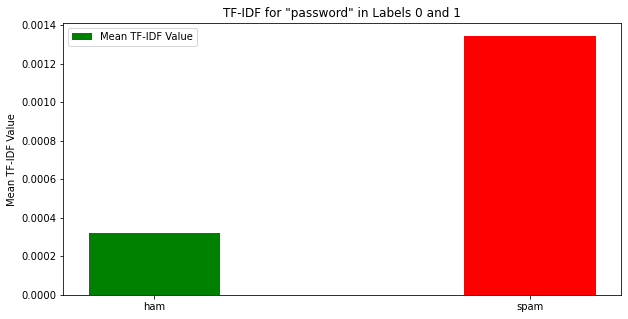

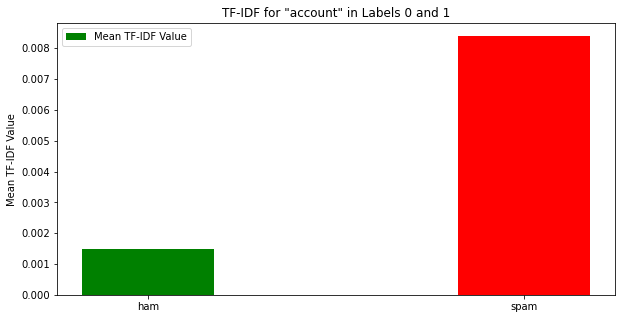

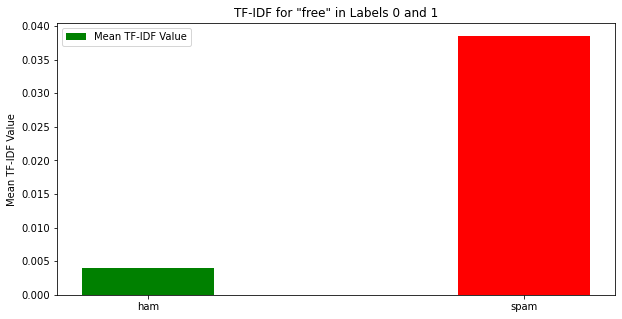

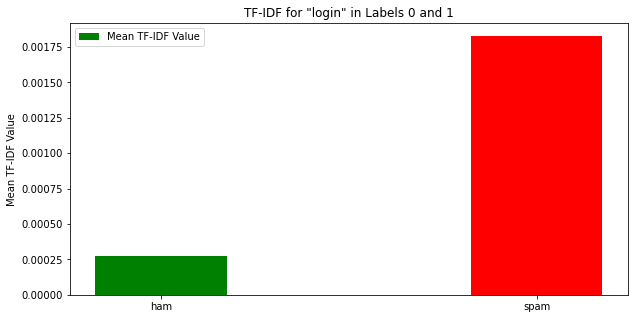

In [101]:
import matplotlib.pyplot as plt

# Choose a few words you want to visualize
words_to_visualize = ['password', 'account', 'free', 'login']

# Create a function to plot TF-IDF values for the chosen words
def plot_word_tfidf(word, df1, df2):
    # Get TF-IDF values for the word in both labels
    values_ham = df_ham[word]
    values_spam = df_spam[word]

    # Create a bar chart with different colors for labels
    plt.figure(figsize=(10, 5))
    bar_width = 0.35
    labels = ['ham', 'spam']
    x = range(len(labels))
    plt.bar(x, [values_ham.mean(), values_spam.mean()], width=bar_width, label='Mean TF-IDF Value', color=['green', 'red'])
    plt.title(f'TF-IDF for "{word}" in Labels 0 and 1')
    plt.xticks(x, labels)
    plt.ylabel('Mean TF-IDF Value')
    plt.legend()
    plt.show()

# Loop through the words and plot their TF-IDF values
for word in words_to_visualize:
    plot_word_tfidf(word, df1=df_ham, df2=df_spam)


In [102]:
pred = clf.predict(x_test)

In [103]:
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1207
           1       1.00      0.83      0.91       186

    accuracy                           0.98      1393
   macro avg       0.99      0.91      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [104]:
#confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred = pred)
print(cm)

[[1207    0]
 [  32  154]]


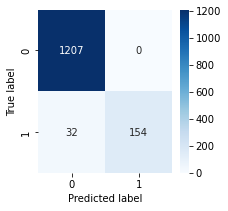

In [105]:
plot_confmatrix(cm)

____________________

____________________